In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# interactive in the notebook
# %matplotlib notebook

# inlined but not interactive
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kohonen import load_data, som_step

### Init

In [4]:
data, labels, target_digits = load_data()  # default name

Your digits:  [2 3 5 7]
Loading from binary...


In [5]:
# Kohonen algorithm hyper-parameters
size_k = 6        # size of the Kohonen map (size_k, size_k)
sigma  = 1        # width of the gaussian neighborhood
eta    = 0.1      # learning rate
tmax   = 10*2000  # max iteration count; substitutes convergence criterion

# initialise the centers randomly
dim = data.shape[1]     # 28*28 = 784
data_range = 255.0
centers = np.random.rand(size_k**2, dim) * data_range

# build a neighborhood matrix
neighbor = np.arange(size_k**2).reshape((size_k, size_k))

# set the random order in which the datapoints should be presented
idxs_random = np.arange(tmax) % data.shape[0]
np.random.shuffle(idxs_random)

In [6]:
def score(centers, data):
    """ Computes how well the centers fit the data """
    s = 0
    for example in data:
        s += np.min(np.sum(centers - example, axis=1)**2)  # uses broadcasting
    return s

### Training

In [ ]:
scores = []
for step, idx in enumerate(idxs_random):
    movement, winner = som_step(centers, data[idx,:],neighbor,eta,sigma)
    if step %  50 == 0:
        scores.append(score(centers, data))
    if step % 500 == 0:
        print(step/tmax*100)

### Display

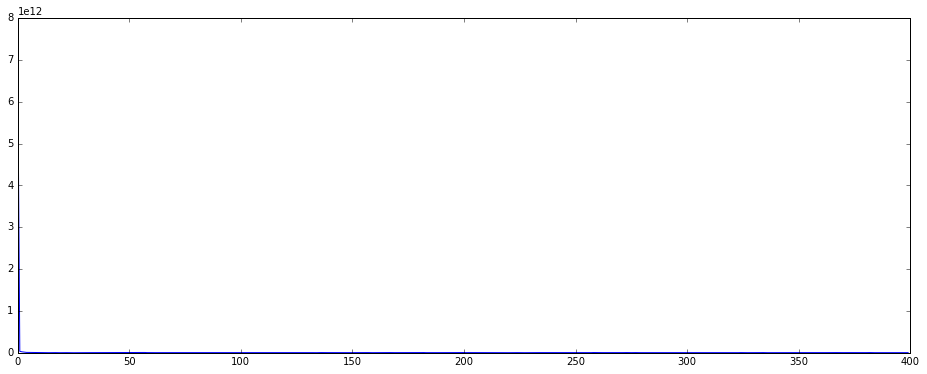

In [9]:
plt.figure(figsize=(16,6))
plt.plot(scores)
# plt.show()

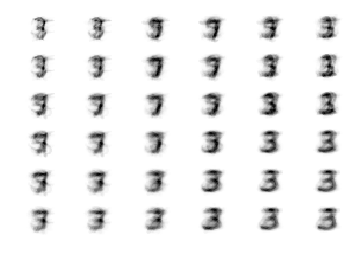

In [10]:
# show centers
for j in range(size_k ** 2):
    plt.subplot(size_k, size_k, j + 1)
    plt.imshow(np.reshape(centers[j, :], [28, 28]), interpolation='nearest', cmap='Greys')
    plt.axis('off')
# plt.show()

In [14]:
def predictNeurons(centers, data, labels, target_digits):
    accumul = np.zeros((len(centers),4))
    for i in range(2000):
        winner = np.argmin(np.sum(centers - data[i], axis=1)**2)
        accumul[winner,target_digits==labels[i]] += 1
    for j in range(len(centers)):
        accumul[j] = target_digits[np.argmax(accumul[j])]
    return accumul[:,0]

In [15]:
predictNeurons(centers, data, labels, target_digits)


array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  5.,  5.,  2.,  2.,  7.,
        7.,  7.,  3.,  2.,  5.,  7.,  7.,  3.,  2.,  3.,  5.,  3.,  2.,
        2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.])

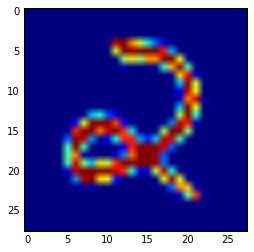

In [16]:
plt.imshow(np.reshape(data[1], [28, 28]))
# plt.show()

In [17]:
labels[1]

2.0

In [56]:
neighbor

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])